In [1]:
import sympy as sp

In [2]:
x= sp.symbols('x')

In [4]:
# legendtre operator L_()
# to use .args properly t term is used whose effect will be neglected later and no effect on cofficent by t
def L_(f):
    t=x**2 
    return sp.expand(t*(sp.diff(f,x,2) -2*x*sp.diff(f,x))) 

In [23]:
P = 7
n = P+1
basis = []
for i in range(n):
    basis.append(x**i)
basis

[1, x, x**2, x**3, x**4, x**5, x**6, x**7]

In [24]:
#check
tp=L_(basis[1])


In [25]:
#check
tp

-2*x**3

In [26]:
# to store terms corresponding to column vector
Ll=[]
t=[]
for i in range(n):
    t.append(L_(basis[i]))
    Ll.append(t)
    t=[]
Ll

[[0],
 [-2*x**3],
 [-4*x**4 + 2*x**2],
 [-6*x**5 + 6*x**3],
 [-8*x**6 + 12*x**4],
 [-10*x**7 + 20*x**5],
 [-12*x**8 + 30*x**6],
 [-14*x**9 + 42*x**7]]

In [27]:
# to convert the Ll terms into required matrix ,L, whose eigenvalues and eigen vectors is to be find
import numpy as np
L = np.zeros([n,n])
L[1][1]=-2
# substituting value in 2nd row
L


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [28]:
#check
Ll[2][0].args

(-4*x**4, 2*x**2)

In [29]:
# filling values in L
# also ist row contains 0 only and 2nd row contains -2 only which is replaced already
# all other remaining rows have 2 elements only
for i in range(2,n):
    l1=Ll[i][0].args[0]
    l2=Ll[i][0].args[1]
    
    l1c=float(l1.args[0])
    l2c=float(l2.args[0])
    
    l1_=l1.args[1]
    l2_=l2.args[1]
    
    l1p=int(l1_.args[1])
    l2p=int(l2_.args[1])
    for j in range(2):
        if j==0:
            L[i][l1p-2]=l1c # power is removed by one which is added extra in L_ function
        else:
            L[i][l2p-2]=l2c

L_f = L.T
print(L_f)

[[  0.   0.   2.   0.   0.   0.   0.   0.]
 [  0.  -2.   0.   6.   0.   0.   0.   0.]
 [  0.   0.  -4.   0.  12.   0.   0.   0.]
 [  0.   0.   0.  -6.   0.  20.   0.   0.]
 [  0.   0.   0.   0.  -8.   0.  30.   0.]
 [  0.   0.   0.   0.   0. -10.   0.  42.]
 [  0.   0.   0.   0.   0.   0. -12.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -14.]]


In [30]:
#get eigen values and corresponding eigen-vectors of L
evalue,evec = np.linalg.eig(L_f)
evec.T

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.4472136 ,  0.        ,  0.89442719,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.83205029,  0.        ,  0.5547002 ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.23076923,  0.        , -0.92307692,  0.        ,  0.30769231,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.59246438,  0.        , -0.78995251,  0.        ,
         0.1579905 ,  0.        ,  0.        ],
       [-0.13699344,  0.        ,  0.82196065,  0.        , -0.54797377,
         0.        ,  0.07306317,  0.        ],
       [ 0.        , -0.42085943,  0.        ,  0.84171886,  0.        ,
        -0.33668754,  0.        ,  0.03206548]])

In [31]:
basis

[1, x, x**2, x**3, x**4, x**5, x**6, x**7]

In [32]:
# .dot() do dot product of two vectors(evec.T[i] and basis)
# to get evec as function of polynomial 
# like reversing the process back to Ll matrix but this time with eigenvector coefficient
eigenfn =[]
for i in range(n):
    W = evec.T[i].dot(basis)
    eigenfn.append(W)
eigenfn

[1.00000000000000,
 1.0*x,
 0.894427190999916*x**2 - 0.447213595499958,
 0.554700196225229*x**3 - 0.832050294337844*x,
 0.307692307692308*x**4 - 0.923076923076923*x**2 + 0.230769230769231,
 0.157990501106673*x**5 - 0.789952505533364*x**3 + 0.592464379150023*x,
 0.0730631692976393*x**6 - 0.547973769732295*x**4 + 0.821960654598442*x**2 - 0.136993442433074,
 0.0320654804384067*x**7 - 0.33668754460327*x**5 + 0.841718861508176*x**3 - 0.420859430754088*x]

Text(0.5, 1.0, 'Legendre :: Linear Transformation')

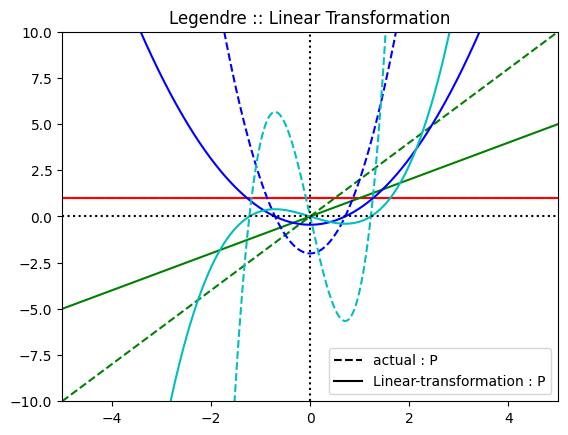

In [35]:
#plot
import matplotlib.pyplot as plt
from scipy.special import hermite

#color list in order to make sure that legendre actual-P and P has same color
clr=['r','g','b','c','m','k','y','w']

factor=0.01
t1= list(np.arange(-5,5,factor))

Efinal = []

#plot is upto degree of basis
pv=4
assert pv<=n

for i in range(pv):
    EF = []
    for j in t1:
#         p = eigenfn[i].subs({x:float(j)})               #converts the variable x in eigenfn to j
#         EF.append(p)
            #or
          q = sp.lambdify(x,eigenfn[i])
          p = q(float(j))
          EF.append(p)
    Efinal.append(EF)
    
    leg=hermite(i)
    plt.plot(t1,leg(t1),ls="--",c=clr[i])
    plt.plot(t1,Efinal[i],c=clr[i])
        
plt.xlim([-5,5])
plt.ylim([-10,10])

plt.plot(0,label='actual : P',c='k',ls='--')
plt.plot(0,label='Linear-transformation : P',c='k')
plt.legend(loc='best')
plt.axvline(x=0,c='k',ls=':')
plt.axhline(y=0,c='k',ls=':')
plt.title("Legendre :: Linear Transformation")

# print(Efinal)
# plt.yticks(np.arange(-1,1,0.1))
# plt.xticks(np.arange(-1,1,0.1))

the difference between actual-P and P always remains and cannot be removed by variable factor

In [34]:
##check
# from scipy.special import legendre
# l=legendre(2)
# #t=np.linspace(-1,1,100)
# t= list(np.arange(-1,1,accuracy))

# plt.plot(t,l(t))

In [24]:
##check
# EF=[]
# t1= list(np.arange(-1,1,0.1))
# for j in t1:
#     q = sp.lambdify(x,eigenfn[2])
#     p=q(float(j))#converts the variable x in eigenfn to j
#     EF.append(p)
# EF